In [1]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

In [2]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [3]:
tickers = []

for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

In [4]:
tickers = [s.replace('\n', '') for s in tickers]

In [5]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2022, 1, 1)
data = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  503 of 503 completed

4 Failed downloads:
- BRK.B: No data found for this date range, symbol may be delisted
- CEG: Data doesn't exist for startDate = 1577854800, endDate = 1641013200
- GEHC: Data doesn't exist for startDate = 1577854800, endDate = 1641013200
- BF.B: No data found for this date range, symbol may be delisted


In [6]:
df = data.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Date'])

In [7]:
import seaborn as sns

In [8]:
df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,A,84.108368,85.949997,86.349998,85.199997,85.900002,1410500.0
496,2020-01-03,A,82.757927,84.570000,85.330002,84.500000,84.669998,1118300.0
992,2020-01-06,A,83.002571,84.820000,84.820000,83.599998,84.000000,1993200.0
1488,2020-01-07,A,83.257004,85.080002,85.260002,83.940002,83.959999,1684700.0
1984,2020-01-08,A,84.079002,85.919998,86.470001,85.199997,85.959999,1847600.0
...,...,...,...,...,...,...,...,...
249548,2021-12-27,ZTS,244.140884,246.509995,246.720001,243.080002,244.389999,807000.0
250047,2021-12-28,ZTS,241.902618,244.250000,247.839996,243.639999,247.000000,1004400.0
250546,2021-12-29,ZTS,244.655899,247.029999,247.850006,243.639999,244.020004,939900.0
251045,2021-12-30,ZTS,242.803879,245.160004,249.270004,244.960007,247.050003,859100.0


In [13]:
df.groupby(['Date', 'Symbol'])['Close'].mean().reset_index()

,Date,Symbol,Close
0,2020-01-02,A,85.949997
1,2020-01-02,AAL,29.090000
2,2020-01-02,AAP,159.410004
3,2020-01-02,AAPL,75.087502
4,2020-01-02,ABBV,89.550003
...,...,...,...
251540,2021-12-31,YUM,138.860001
251541,2021-12-31,ZBH,123.339806
251542,2021-12-31,ZBRA,595.200012
251543,2021-12-31,ZION,63.160000


<AxesSubplot:xlabel='Date', ylabel='Close'>

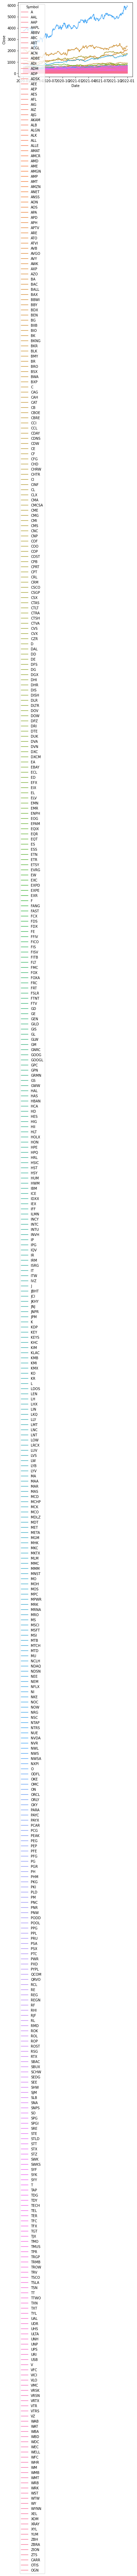

In [14]:
sns.lineplot(x = 'Date', y = 'Close', data = df.groupby(['Date', 'Symbol'])['Close'].mean().reset_index(), hue = 'Symbol')